In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [7]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 40), (1121, 40))

In [8]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 40), (169, 40))

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers, models, optimizers

2024-12-28 05:03:41.740886: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-28 05:03:41.742181: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-28 05:03:41.764515: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 05:03:41.764538: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 05:03:41.764553: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
# Define a ResNet block
def resnet_block(input_tensor, units):
    x = layers.Dense(units, activation='relu')(input_tensor)
    x = layers.Dense(units)(x)
    x = layers.Add()([x, input_tensor])  # Add skip connection
    x = layers.ReLU()(x)
    return x

# Define the full ResNet model
def build_resnet_model(input_dim, hidden_dim, output_dim, num_blocks):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(hidden_dim, activation='relu')(inputs)
    
    for _ in range(num_blocks):
        x = resnet_block(x, hidden_dim)
    
    outputs = layers.Dense(output_dim, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model

In [11]:
input_dim = x_train.shape[1]
hidden_dim = 128
output_dim = len(y_train.unique())  # For classification
num_blocks = 3
learning_rate = 0.001
batch_size = 32
num_epochs = 800

In [12]:
model = build_resnet_model(input_dim, hidden_dim, output_dim, num_blocks)
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history=model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data= (x_val, y_val))

Epoch 1/800
82/82 [==============================] - 1s 3ms/step - loss: 1.5269 - accuracy: 0.4503 - val_loss: 1.2884 - val_accuracy: 0.5357
Epoch 2/800
82/82 [==============================] - 0s 1ms/step - loss: 1.1127 - accuracy: 0.5979 - val_loss: 1.0589 - val_accuracy: 0.6113
Epoch 3/800
 1/82 [..............................] - ETA: 0s - loss: 1.0161 - accuracy: 0.6875

2024-12-28 05:03:43.773191: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node model/re_lu_2/Relu}}
	.  Registered:  <no registered kernels>

2024-12-28 05:03:43.774677: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node model/re_lu_1/Relu}}
	.  Registered:  <no registered kernels>

2024-12-28 05:03:43.775355: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node model/re_lu/Relu}}
	.  Registered:  <no registered kernels>

2024-12-28 05:03:43.777770: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:135] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node model/re_lu/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2024-12-28 05:03:43.781114: 

82/82 [==============================] - 0s 1ms/step - loss: 0.9422 - accuracy: 0.6630 - val_loss: 0.9302 - val_accuracy: 0.6712
Epoch 4/800
82/82 [==============================] - 0s 1ms/step - loss: 0.7978 - accuracy: 0.7177 - val_loss: 0.8917 - val_accuracy: 0.6691
Epoch 5/800
82/82 [==============================] - 0s 1ms/step - loss: 0.7392 - accuracy: 0.7372 - val_loss: 0.9478 - val_accuracy: 0.6723
Epoch 6/800
82/82 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.7636 - val_loss: 0.8342 - val_accuracy: 0.6975
Epoch 7/800
82/82 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7827 - val_loss: 0.8655 - val_accuracy: 0.6964
Epoch 8/800
82/82 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.8057 - val_loss: 0.7893 - val_accuracy: 0.7374
Epoch 9/800
82/82 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.8194 - val_loss: 0.7665 - val_accuracy: 0.7416
Epoch 10/800
82/82 [=====

Epoch 61/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9767 - val_loss: 1.0587 - val_accuracy: 0.7889
Epoch 62/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9721 - val_loss: 1.1112 - val_accuracy: 0.7721
Epoch 63/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9713 - val_loss: 1.1258 - val_accuracy: 0.7899
Epoch 64/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9728 - val_loss: 1.1580 - val_accuracy: 0.7815
Epoch 65/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9790 - val_loss: 1.1134 - val_accuracy: 0.7889
Epoch 66/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9790 - val_loss: 1.2111 - val_accuracy: 0.7742
Epoch 67/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9801 - val_loss: 1.1056 - val_accuracy: 0.7910
Epoch 

82/82 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9912 - val_loss: 1.4356 - val_accuracy: 0.7878
Epoch 119/800
82/82 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9514 - val_loss: 1.2618 - val_accuracy: 0.7668
Epoch 120/800
82/82 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.9549 - val_loss: 1.3937 - val_accuracy: 0.7258
Epoch 121/800
82/82 [==============================] - 0s 1ms/step - loss: 0.1573 - accuracy: 0.9514 - val_loss: 1.0473 - val_accuracy: 0.7836
Epoch 122/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9709 - val_loss: 1.1793 - val_accuracy: 0.7805
Epoch 123/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9793 - val_loss: 1.2129 - val_accuracy: 0.7784
Epoch 124/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9793 - val_loss: 1.1580 - val_accuracy: 0.7878
Epoch 125/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9920 - val_loss: 1.2334 - val_accuracy: 0.8067
Epoch 176/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9920 - val_loss: 1.2681 - val_accuracy: 0.8130
Epoch 177/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9931 - val_loss: 1.2780 - val_accuracy: 0.8067
Epoch 178/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.9943 - val_loss: 1.2750 - val_accuracy: 0.8151
Epoch 179/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9939 - val_loss: 1.3128 - val_accuracy: 0.7994
Epoch 180/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9813 - val_loss: 1.4149 - val_accuracy: 0.7542
Epoch 181/800
82/82 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9575 - val_loss: 1.0765 - val_accuracy: 0.7868
Epoch 182/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.9939 - val_loss: 1.4597 - val_accuracy: 0.7941
Epoch 233/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9901 - val_loss: 1.4501 - val_accuracy: 0.7962
Epoch 234/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9908 - val_loss: 1.4706 - val_accuracy: 0.7857
Epoch 235/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9878 - val_loss: 1.5023 - val_accuracy: 0.7794
Epoch 236/800
82/82 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.9625 - val_loss: 1.2664 - val_accuracy: 0.7521
Epoch 237/800
82/82 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9526 - val_loss: 1.1516 - val_accuracy: 0.7784
Epoch 238/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9843 - val_loss: 1.3645 - val_accuracy: 0.7868
Epoch 239/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9897 - val_loss: 1.3699 - val_accuracy: 0.7889
Epoch 290/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9901 - val_loss: 1.4315 - val_accuracy: 0.7910
Epoch 291/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9885 - val_loss: 1.4352 - val_accuracy: 0.7868
Epoch 292/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9770 - val_loss: 1.3419 - val_accuracy: 0.7868
Epoch 293/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9904 - val_loss: 1.4063 - val_accuracy: 0.7931
Epoch 294/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9912 - val_loss: 1.4663 - val_accuracy: 0.7952
Epoch 295/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9935 - val_loss: 1.4830 - val_accuracy: 0.7899
Epoch 296/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9855 - val_loss: 1.3612 - val_accuracy: 0.8004
Epoch 347/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 1.6291 - val_accuracy: 0.7836
Epoch 348/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9778 - val_loss: 1.5508 - val_accuracy: 0.7637
Epoch 349/800
82/82 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.9694 - val_loss: 1.2092 - val_accuracy: 0.7889
Epoch 350/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9881 - val_loss: 1.4887 - val_accuracy: 0.7815
Epoch 351/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 1.5842 - val_accuracy: 0.7920
Epoch 352/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9843 - val_loss: 1.6329 - val_accuracy: 0.7805
Epoch 353/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9950 - val_loss: 1.7679 - val_accuracy: 0.8109
Epoch 404/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9954 - val_loss: 1.7747 - val_accuracy: 0.8120
Epoch 405/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9958 - val_loss: 1.7798 - val_accuracy: 0.8109
Epoch 406/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9950 - val_loss: 1.7858 - val_accuracy: 0.8120
Epoch 407/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.9950 - val_loss: 1.7717 - val_accuracy: 0.8099
Epoch 408/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9943 - val_loss: 1.7708 - val_accuracy: 0.8088
Epoch 409/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9958 - val_loss: 1.7873 - val_accuracy: 0.8099
Epoch 410/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9904 - val_loss: 1.7844 - val_accuracy: 0.7920
Epoch 461/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9686 - val_loss: 1.6131 - val_accuracy: 0.7742
Epoch 462/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9793 - val_loss: 1.5322 - val_accuracy: 0.8004
Epoch 463/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9927 - val_loss: 1.5476 - val_accuracy: 0.7941
Epoch 464/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9935 - val_loss: 1.6911 - val_accuracy: 0.7994
Epoch 465/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 1.6476 - val_accuracy: 0.8025
Epoch 466/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 0.9946 - val_loss: 1.6950 - val_accuracy: 0.8025
Epoch 467/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9931 - val_loss: 1.5463 - val_accuracy: 0.8151
Epoch 518/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9912 - val_loss: 1.5630 - val_accuracy: 0.8004
Epoch 519/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 1.3904 - val_accuracy: 0.7731
Epoch 520/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9751 - val_loss: 1.3306 - val_accuracy: 0.7815
Epoch 521/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9889 - val_loss: 1.5748 - val_accuracy: 0.7931
Epoch 522/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 1.4326 - val_accuracy: 0.8067
Epoch 523/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9920 - val_loss: 1.4735 - val_accuracy: 0.7889
Epoch 524/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9946 - val_loss: 2.2816 - val_accuracy: 0.7910
Epoch 575/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9954 - val_loss: 2.2978 - val_accuracy: 0.7899
Epoch 576/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9946 - val_loss: 2.3100 - val_accuracy: 0.7910
Epoch 577/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9950 - val_loss: 2.3286 - val_accuracy: 0.7899
Epoch 578/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9954 - val_loss: 2.3278 - val_accuracy: 0.7847
Epoch 579/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9954 - val_loss: 2.3411 - val_accuracy: 0.7836
Epoch 580/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9950 - val_loss: 2.3552 - val_accuracy: 0.7878
Epoch 581/800

82/82 [==============================] - 0s 1ms/step - loss: 0.3130 - accuracy: 0.9074 - val_loss: 1.3082 - val_accuracy: 0.7542
Epoch 632/800
82/82 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.9644 - val_loss: 1.1725 - val_accuracy: 0.7857
Epoch 633/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9828 - val_loss: 1.5217 - val_accuracy: 0.7941
Epoch 634/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9904 - val_loss: 1.5112 - val_accuracy: 0.7847
Epoch 635/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.9939 - val_loss: 1.7114 - val_accuracy: 0.7973
Epoch 636/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9943 - val_loss: 1.7550 - val_accuracy: 0.8015
Epoch 637/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.9946 - val_loss: 1.8245 - val_accuracy: 0.7952
Epoch 638/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9946 - val_loss: 2.3845 - val_accuracy: 0.7973
Epoch 689/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9954 - val_loss: 2.3823 - val_accuracy: 0.7962
Epoch 690/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9958 - val_loss: 2.4002 - val_accuracy: 0.7952
Epoch 691/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9950 - val_loss: 2.3953 - val_accuracy: 0.7962
Epoch 692/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9950 - val_loss: 2.3845 - val_accuracy: 0.7952
Epoch 693/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9950 - val_loss: 2.3929 - val_accuracy: 0.7962
Epoch 694/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9958 - val_loss: 2.4080 - val_accuracy: 0.7973
Epoch 695/800

82/82 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9881 - val_loss: 1.7351 - val_accuracy: 0.7983
Epoch 746/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9927 - val_loss: 2.0395 - val_accuracy: 0.7973
Epoch 747/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.9950 - val_loss: 2.1655 - val_accuracy: 0.7920
Epoch 748/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9935 - val_loss: 2.2205 - val_accuracy: 0.7931
Epoch 749/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.9954 - val_loss: 2.2597 - val_accuracy: 0.8036
Epoch 750/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9923 - val_loss: 2.2228 - val_accuracy: 0.7973
Epoch 751/800
82/82 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 0.9939 - val_loss: 2.2482 - val_accuracy: 0.7973
Epoch 752/800

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 40)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  5248      ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 128)                  16512     ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 128)                  16512     ['dense_1[0][0]']             
                                                                                              

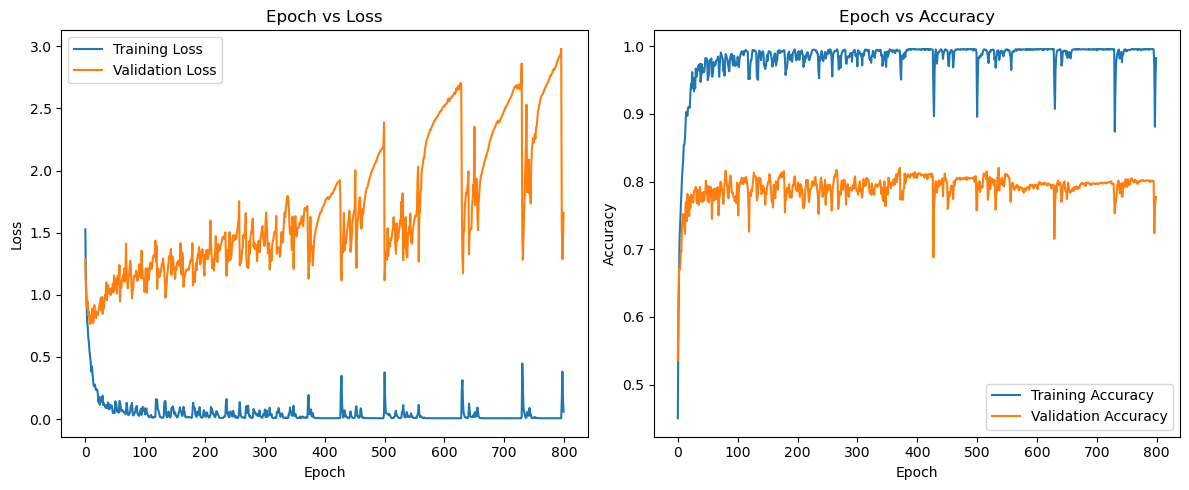

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.36%
Test Accuracy: 79.88%


6/6 [==============================] - 0s 864us/step


2024-12-28 05:05:15.657038: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node model/re_lu_2/Relu}}
	.  Registered:  <no registered kernels>

2024-12-28 05:05:15.658419: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node model/re_lu_1/Relu}}
	.  Registered:  <no registered kernels>

2024-12-28 05:05:15.659153: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node model/re_lu/Relu}}
	.  Registered:  <no registered kernels>

2024-12-28 05:05:15.660532: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:135] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node model/re_lu/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2024-12-28 05:05:15.662644: 

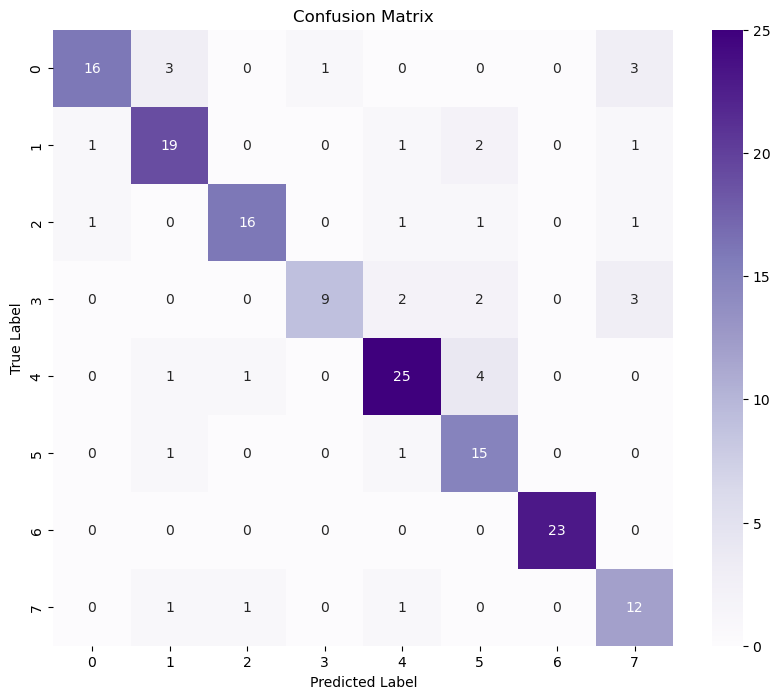

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        23
           1       0.76      0.79      0.78        24
           2       0.89      0.80      0.84        20
           3       0.90      0.56      0.69        16
           4       0.81      0.81      0.81        31
           5       0.62      0.88      0.73        17
           6       1.00      1.00      1.00        23
           7       0.60      0.80      0.69        15

    accuracy                           0.80       169
   macro avg       0.81      0.79      0.79       169
weighted avg       0.82      0.80      0.80       169



In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)